# DIABETES PREDICTION :

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

df = pd.read_csv('notes\datasets\diabetes.csv')

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 0 : NON-DIABETIC

### 1 : DIABETIC

In [4]:
x = df.drop(columns= 'Outcome', axis = 1)
y = df['Outcome']

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

clf = svm.SVC(kernel='linear')

clf.fit(x_train,y_train)

SVC(kernel='linear')

## Accuracy on training data

In [5]:
x_train_prediction = clf.predict(x_train)

accuracy_score(x_train_prediction,y_train)

0.7768729641693811

## Accuracy on test data :

In [6]:
x_test_prediction = clf.predict(x_test)

accuracy_score(x_test_prediction,y_test)

0.7922077922077922

In [7]:
input = (5,166,72,19,175,22.7,0.6,51)

x_input = np.array(input)

x_input = x_input.reshape(1,-1)

standard_input = scaler.transform(x_input)

prediction = clf.predict(standard_input)

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
if(prediction == 0):
    print("NON_DIABETIC")

else:
    print("DIABETIC")

DIABETIC


---------------------------------------------------------

# MEDICAL INSURANCE COST PREDICTION :

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

df = pd.read_csv('notes/datasets/insurance.csv')

## Data Description :

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.shape

(1338, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ariha\AppData\Local\Temp\ipykernel_4952\533157836.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0.5, 1.0, 'Age Distribution')

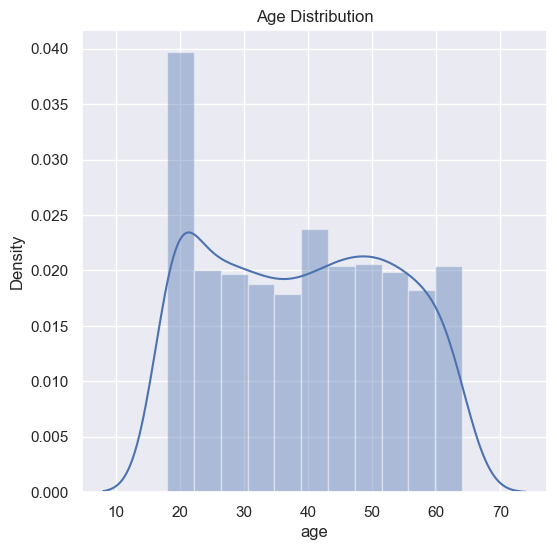

In [15]:
sns.set()
plt.figure(figsize=(6,6))

sns.distplot(df['age'])
plt.title("Age Distribution")

Text(0.5, 1.0, 'Sex Distribution')

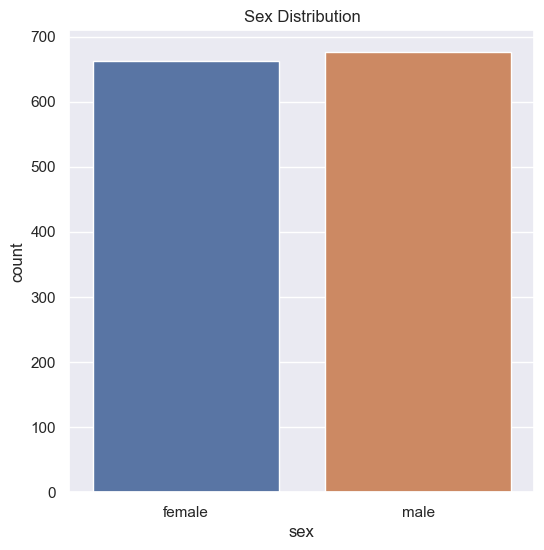

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x = "sex",data= df)
plt.title("Sex Distribution")

In [17]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ariha\AppData\Local\Temp\ipykernel_4952\1018674143.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


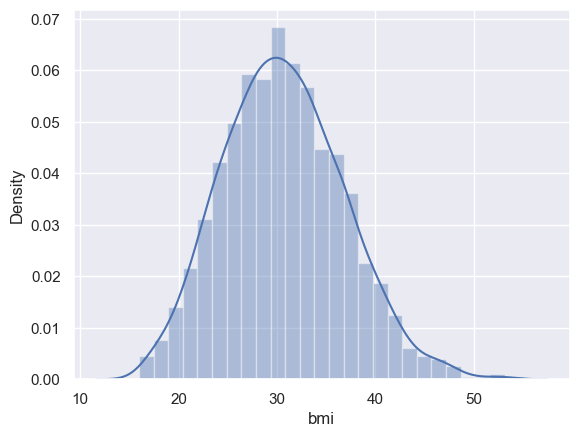

In [18]:
sns.distplot(df['bmi'])
plt.show()

In [19]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

### Encoding data for regression :

In [20]:
df.replace({'sex':{'male':0,'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0,'no':1}}, inplace = True)
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace = True)

In [21]:
x = df.drop(columns='charges', axis = 1)
y = df['charges']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

y_train

1227     7162.01220
850     37270.15120
492      2196.47320
1181     2850.68375
261     17085.26760
           ...     
798     11848.14100
520     25656.57526
588     13635.63790
480     15555.18875
410      1621.34020
Name: charges, Length: 1070, dtype: float64

In [22]:

reg = LinearRegression()

reg.fit(x_train,y_train)

LinearRegression()

## R2 Score on Training data :

In [23]:
train_predict = reg.predict(x_train)

r2_train = metrics.r2_score(y_train,train_predict)
r2_train

0.7602275293821403

## R2 Score on Test data :

In [24]:
test_predict = reg.predict(x_test)

metrics.r2_score(y_test,test_predict)

0.6952453863264894

In [25]:
sample = (30,1,22.7,0,1,0)

in_sample = np.asarray(sample)

in_sample = in_sample.reshape(1,-1)

in_predict = reg.predict(in_sample)

c:\Users\ariha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [26]:
print("Insurance cost :", in_predict)

Insurance cost : [2292.14021829]


---------------------------------------------------------

# GOLD PRICE PREDICTION :

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

df = pd.read_csv('notes\datasets\gld_price_data.csv')

df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/08,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/08,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/08,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/08,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/08,1390.189941,86.779999,76.059998,15.590,1.557099


In [29]:
x = df.drop(columns =['GLD','Date'] )
y = df['GLD']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test) 

In [35]:
model = Sequential()

model.add(Dense(10,activation = 'relu',input_dim = 4))
model.add(Dense(10,activation = 'relu'))
model.add(Dense(1,activation = 'linear'))
model.compile(loss = 'mean_squared_error',optimizer = 'Nadam')

In [36]:
history = model.fit(x_train,y_train,epochs=100,validation_split=0.1)

Epoch 1/100


52/52 [==============================] - 2s 7ms/step - loss: 15617.4648 - val_loss: 15497.2510
Epoch 2/100
52/52 [==============================] - 0s 3ms/step - loss: 15446.9893 - val_loss: 15214.5127
Epoch 3/100
52/52 [==============================] - 0s 3ms/step - loss: 14970.6016 - val_loss: 14478.5771
Epoch 4/100
52/52 [==============================] - 0s 3ms/step - loss: 13885.8232 - val_loss: 13042.8672
Epoch 5/100
52/52 [==============================] - 0s 3ms/step - loss: 12051.5146 - val_loss: 10855.5840
Epoch 6/100
52/52 [==============================] - 0s 3ms/step - loss: 9532.6182 - val_loss: 8128.7773
Epoch 7/100
52/52 [==============================] - 0s 3ms/step - loss: 6681.1226 - val_loss: 5313.3022
Epoch 8/100
52/52 [==============================] - 0s 3ms/step - loss: 4039.8354 - val_loss: 2970.6873
Epoch 9/100
52/52 [==============================] - 0s 3ms/step - loss: 2101.4329 - val_loss: 1473.1455
Epoch 10/100
52/52 [==============================] - 0s 

In [37]:
y_pred = model.predict(x_test)

15/15 [==============================] - 0s 2ms/step


In [38]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.8646860908170766

---------------------------------------------------------

# 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPool2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score

from tensorflow.keras.datasets import cifar10
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
x_train[1]
x_train = x_train/255
x_test = x_test/255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(4,4),input_shape = (32,32,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation = 'relu'))

model.compile(loss='categorical_crossentropy',optimizer='Nadam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        16416     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

In [ ]:
history = model.fit(x_train,y_train,epochs=20,verbose=1,validation_data=(x_test,y_test))

---------------------------------------------------------

# Stock Price - Gold Prediction :

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

import warnings

warnings.filterwarnings('ignore')

df = pd.read_csv('notes/datasets/MSFT.csv')

In [2]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400


## Visualizing data :

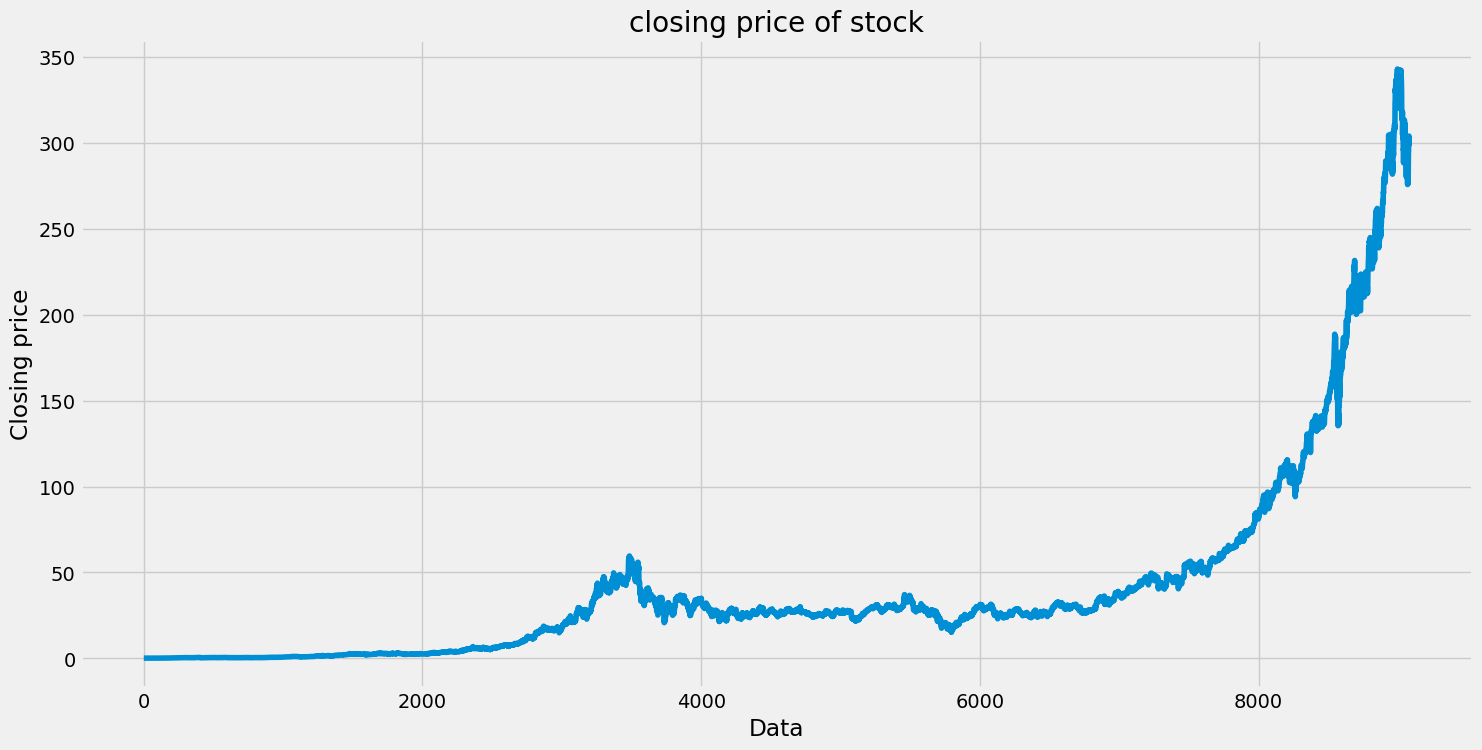

In [3]:
plt.figure(figsize=(16,8))
plt.title('closing price of stock')
plt.plot(df['Close'])
plt.xlabel('Data')
plt.ylabel('Closing price')
plt.show()

## Filtering data :

In [4]:
data = df.filter(['Close'])
dataset = data.values

training_data_len = math.ceil(len(dataset)*0.8)

scaler = StandardScaler()

scaled_data = scaler.fit_transform(dataset)

print("Mean of processed data :", scaled_data.mean())
print("Standard Deviation of processed data :", scaled_data.std())

Mean of processed data : 1.0013153162753806e-16
Standard Deviation of processed data : 1.0


## Creating training data :

In [5]:
train_data = scaled_data[0:training_data_len, :]

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i])
    y_train.append(train_data[i])

x_train,y_train = np.array(x_train),np.array(y_train)

x_train.shape

(7207, 60, 1)

In [6]:
print("x_train shape before reshaping :", x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping :", x_train.shape)

x_train shape before reshaping : (7207, 60, 1)
x_train shape after reshaping : (7207, 60, 1)


In [7]:
model = Sequential()
model.add(LSTM(200,return_sequences=True,input_shape = (x_train.shape[1],1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='Nadam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 507601 (1.94 MB)
Trainable params: 507601 (1.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training model :

In [8]:
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
226/226 [==============================] - 61s 233ms/step - loss: 0.0016
Epoch 2/10
226/226 [==============================] - 54s 238ms/step - loss: 2.8251e-04
Epoch 3/10
226/226 [==============================] - 58s 256ms/step - loss: 2.4500e-04
Epoch 4/10
226/226 [==============================] - 60s 268ms/step - loss: 1.9076e-04
Epoch 5/10
226/226 [==============================] - 62s 274ms/step - loss: 1.7936e-04
Epoch 6/10
226/226 [==============================] - 68s 302ms/step - loss: 1.6698e-04
Epoch 7/10
226/226 [==============================] - 64s 281ms/step - loss: 1.4612e-04
Epoch 8/10
226/226 [==============================] - 65s 287ms/step - loss: 1.1660e-04
Epoch 9/10
226/226 [==============================] - 66s 290ms/step - loss: 1.3457e-04
Epoch 10/10
226/226 [==============================] - 67s 295ms/step - loss: 1.1007e-04


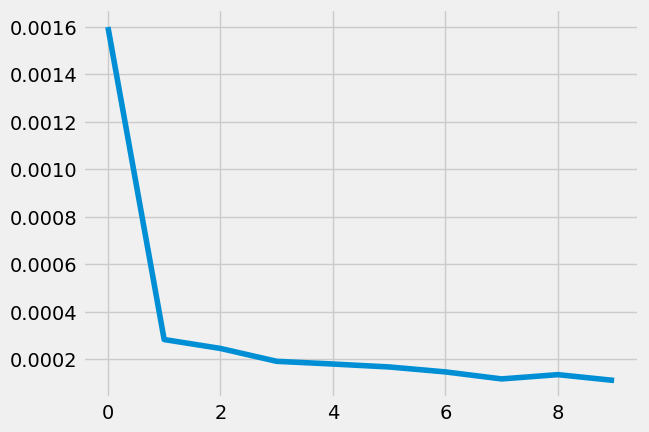

In [12]:
plt.plot(history.history['loss'])

In [13]:
test_data = scaled_data[training_data_len-60:,:]
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

x_test = np.array(x_test)

x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

prediction = model.predict(x_test)

prediction = scaler.inverse_transform(prediction)

print(prediction)

57/57 [==============================] - 3s 53ms/step
[[ 45.98917]
 [ 47.24852]
 [ 47.11217]
 ...
 [284.04456]
 [286.44186]
 [284.79822]]


In [14]:
from sklearn.metrics import r2_score

r2_score(y_test,prediction)

0.9908930113261137

-------------------------------------------------------------------------------